# Advanced Data Mining

## Data preprocessing

### Filtering data by language

In [1]:
from matplotlib import pyplot as plt

from scripts.colors import bold
from scripts.preprocess import detect_language
from scripts.utils import setup, checkpoint

Matplotlib created a temporary cache directory at /tmp/matplotlib-w2bssodv because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
setup()

Load data from previous step

In [3]:
df = checkpoint("01-balanced")

rows, cols = df.shape
print("Dataframe contains", bold(f"{rows} rows"), "and", bold(f"{cols} columns"))

Dataframe contains 20000 rows and 19 columns


Add column with information about language

In [4]:
df['language'] = df['body'].progress_apply(detect_language)

  0%|          | 0/20000 [00:00<?, ?it/s]

Check language distribution

language
english        19936
catalan           28
arabic            20
french             4
danish             2
dutch              2
portuguese         1
azerbaijani        1
greek              1
turkish            1
indonesian         1
spanish            1
german             1
italian            1
Name: count, dtype: int64


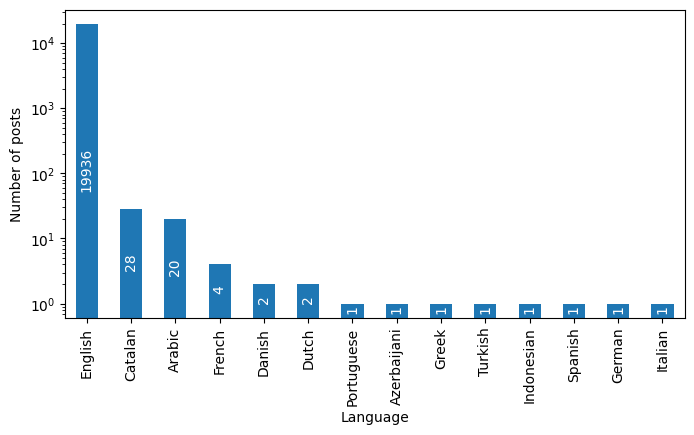

In [5]:
languages = df['language'].value_counts()
print(languages)
languages.index = languages.index.str.capitalize()
ax = languages.plot(kind='bar', figsize=(8, 4), logy=True)
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white', rotation=90, padding=1)
plt.xlabel('Language')
plt.ylabel('Number of posts')
plt.show()

Remove languages other than English

In [6]:
rows_count = df.shape[0]
df = df[df['language'] == 'english']
rows_count = rows_count - df.shape[0]
print(rows_count, "row" if rows_count == 1 else "rows", "affected")

rows, cols = df.shape
print("Dataframe contains", bold(f"{rows} rows"), "and", bold(f"{cols} columns"))

64 rows affected
Dataframe contains 19936 rows and 20 columns


Check subreddit's distribution and if dataset is still balanced

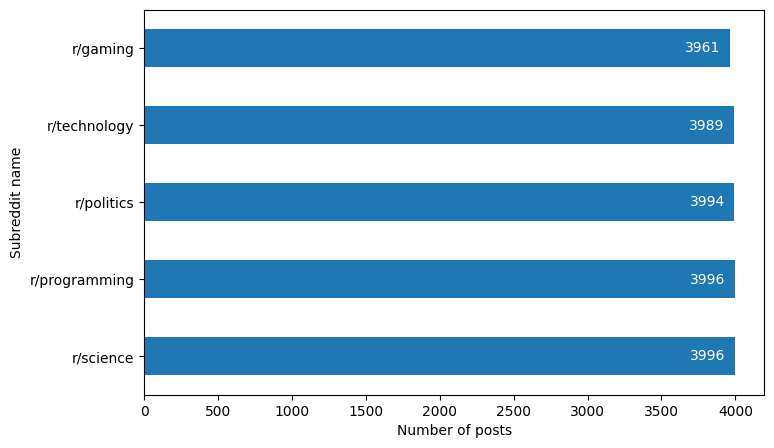

In [7]:
subreddits = df['subreddit'].value_counts()
subreddits.index = 'r/' + subreddits.index

ax = subreddits.plot(kind="barh", figsize=(8, 5))
for container in ax.containers:
    ax.bar_label(container, padding=-32, color='white')
plt.xlabel('Number of posts')
plt.ylabel('Subreddit name')
plt.show()

In [8]:
_ = checkpoint("02-english", dataframe=df)